## 1. Opis problema


##### Uvod

Finansijske institucije trpe značajne gubitke zbog neplaćanja auto kredita. Ovo je dovelo do pooštravanja kriterijuma za odobravanje auto kredita i povećanja stope odbijanja zahteva za kredit. Potreba za boljim modelom za ocenjivanje kreditnog rizika je takođe postala očigledna. Ovo zahteva istraživanje kako bi se procenile determinante neplaćanja auto kredita. Finansijska institucija vas je angažovala da tačno predvidite verovatnoću da korisnik kredita neće platiti prvu ratu auto kredita na vreme. Sledeće informacije o kreditu i korisniku kredita su dostupne u datasetovima:
- 	Informacije o korisniku kredita (demografski podaci kao što su starost, dokaz o identitetu itd.)
-	Informacije o kreditu (detalji o isplati kredita, odnos vrednosti kredita prema vrednosti vozila itd.)
-	Podaci iz kreditnog biroa i istorija (kreditni skor, broj aktivnih računa, status drugih kredita, kreditna istorija itd.)

Na ovaj način će se osigurati da klijenti koji su sposobni za otplatu kredita ne budu odbijeni, a važni faktori se mogu identifikovati i dalje koristiti za minimiziranje stope neplaćanja.


##### Opis problema

Korisnici auto kredita često ne plaćaju svoje obaveze, što rezultira gubicima za finansijske institucije. Da bi se minimizirali ovi gubici, finansijske institucije pooštravaju kriterijume za odobravanje kredita, što povećava stopu odbijanja zahteva. Ovaj problem zahteva razvoj boljeg modela za procenu kreditnog rizika kako bi se preciznije predvidelo koje kredite treba odobriti. Precizno predviđanje neplaćanja prve rate kredita omogućava institucijama da smanje rizik i bolje upravljaju svojim portfoliom.

##### Koji su izazovi u resavanju problema (kasnije bolje)

1.	Nedostatak podataka: Mnogi podaci mogu biti nepotpuni ili netačni, što otežava precizno modeliranje.
2.	Balansiranje podataka: Distribucija ciljne promenljive (neplaćanje kredita) je neizbalansirana, sa mnogo više negativnih (plaćenih) nego pozitivnih (neplaćenih) primera.
3.	Identifikacija ključnih faktora: Identifikacija i selekcija relevantnih karakteristika koje utiču na neplaćanje kredita.
4.	Vremenska komponenta: Promene u ekonomskim uslovima tokom vremena mogu značajno uticati na ponašanje korisnika kredita.


##### Zašto je bitan

Precizno predviđanje neplaćanja auto kredita je važno iz više razloga:
1.	Finansijska stabilnost: Smanjuje finansijske gubitke za banke i druge finansijske institucije.
2.	Poboljšanje procesa odobravanja kredita: Omogućava pravedniji i efikasniji proces odobravanja kredita, smanjujući broj neopravdano odbijenih kredita.
3.	Povećanje poverenja klijenata: Poboljšava odnos sa klijentima pružajući im bolje usluge i proizvode.

##### Kome je bitan

1.	Finansijskim institucijama: Pomaže bankama i kreditnim institucijama da smanje gubitke i optimizuju svoje kreditne procese.
2.	Auto salonima: Omogućava im da ponude kvalitetnija vozila svojim kupcima i smanje rizik loših kupovina.
3.	Kupcima: Povećava poverenje kupaca u kvalitet vozila koja kupuju i u fer kreditne uslove.
4.	Regulatornim telima: Pomaže u stvaranju politika i regulativa koje poboljšavaju stabilnost finansijskog sistema.

U zaključku, razvoj tačnog modela za predviđanje neplaćanja auto kredita može doneti brojne benefite različitim zainteresovanim stranama, poboljšavajući ukupnu efikasnost i stabilnost finansijskog tržišta.


## 2. Opis i razumevanje podataka

In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data_dictionary_file = 'data_dictionary.csv'
train_file = 'train.csv'
pd.set_option('display.max_colwidth', None)
train_df = pd.read_csv(train_file)

##### Opis atributa

In [55]:
# Read in the data dictionary
df_dictionary = pd.read_csv(data_dictionary_file)
df_dictionary.head(40)

,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN
5,5,branch_id,Branch where the loan was disbursed,NaN
6,6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,8,Current_pincode,Current pincode of the customer,NaN
9,9,Date.of.Birth,Date of birth of the customer,NaN


Informacije o korisniku kredita

1.	UniqueID: Identifikator za korisnike.
2.	Current_pincode: Poštanski broj trenutne adrese korisnika.
3.	Date.of.Birth: Datum rođenja korisnika.
4.	Employment.Type: Tip zaposlenja korisnika (Salaried/Self Employed).
5.	MobileNo_Avl_Flag: Indikator da li je korisnik podelio broj mobilnog telefona (1 - da, 0 - ne).
6.	Aadhar_flag: Indikator da li je korisnik podelio Aadhar broj (1 - da, 0 - ne).
7.	PAN_flag: Indikator da li je korisnik podelio PAN broj (1 - da, 0 - ne).
8.	VoterID_flag: Indikator da li je korisnik podelio broj biračke kartice (1 - da, 0 - ne).
9.	Driving_flag: Indikator da li je korisnik podelio broj vozačke dozvole (1 - da, 0 - ne).
10.	Passport_flag: Indikator da li je korisnik podelio broj pasoša (1 - da, 0 - ne).

Informacije o kreditu

11.	loan_default: Indikator neplaćanja prve rate kredita na datum dospeća. (Zavisna varijbla - Output)
12.	disbursed_amount: Iznos kredita koji je odobren i isplaćen korisniku.
13.	asset_cost: Cena imovine za koju je kredit uzet.
14.	ltv (Loan to Value): Odnos vrednosti kredita prema vrednosti imovine.
15.	branch_id: Identifikator filijale gde je kredit odobren.
16.	supplier_id: Identifikator prodavca vozila gde je kredit odobren.
17.	manufacturer_id: Identifikator proizvođača vozila (Hero, Honda, TVS itd.).
18.	DisbursalDate: Datum kada je kredit odobren.
19.	State_ID: Identifikator države gde je kredit odobren.
20.	Employee_code_ID: Identifikator zaposlenog koji je registrovao odobravanje kredita.
21.	PRIMARY.INSTAL.AMT: Iznos mesečne rate za primarni kredit.
22.	SEC.INSTAL.AMT: Iznos mesečne rate za sekundarni kredit.

Podaci iz kreditnog biroa i istorija

23.	PERFORM_CNS.SCORE: Kreditni skor korisnika iz kreditnog biroa.
24.	PERFORM_CNS.SCORE.DESCRIPTION: Opis kreditnog skora iz kreditnog biroa.
25.	PRI.NO.OF.ACCTS: Broj primarnih kredita koje je korisnik uzeo do trenutka odobrenja.
26.	PRI.ACTIVE.ACCTS: Broj aktivnih primarnih kredita koje korisnik ima.
27.	PRI.OVERDUE.ACCTS: Broj primarnih kredita sa kašnjenjem u otplati.
28.	PRI.CURRENT.BALANCE: Ukupan iznos glavnice koji je ostao za otplatu na aktivnim primarnim kreditima.
29.	PRI.SANCTIONED.AMOUNT: Ukupan iznos koji je odobren za sve primarne kredite.
30.	PRI.DISBURSED.AMOUNT: Ukupan iznos koji je isplaćen za sve primarne kredite.
31.	SEC.NO.OF.ACCTS: Broj sekundarnih kredita koje je korisnik uzeo.
32.	SEC.ACTIVE.ACCTS: Broj aktivnih sekundarnih kredita koje korisnik ima.
33.	SEC.OVERDUE.ACCTS: Broj sekundarnih kredita sa kašnjenjem u otplati.
34.	SEC.CURRENT.BALANCE: Ukupan iznos glavnice koji je ostao za otplatu na aktivnim sekundarnim kreditima.
35.	SEC.SANCTIONED.AMOUNT: Ukupan iznos koji je odobren za sve sekundarne kredite.
36.	SEC.DISBURSED.AMOUNT: Ukupan iznos koji je isplaćen za sve sekundarne kredite.
37.	NEW.ACCTS.IN.LAST.SIX.MONTHS: Broj novih kredita koje je korisnik uzeo u poslednjih šest meseci.
38.	DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: Broj kredita sa kašnjenjem u otplati u poslednjih šest meseci.
39.	AVERAGE.ACCT.AGE: Prosečno trajanje kredita korisnika.
40.	CREDIT.HISTORY.LENGTH: Dužina kreditne istorije korisnika.
41.	NO.OF_INQUIRIES: Broj upita koje je korisnik imao za kredite.


In [56]:
# replace "." with "_" in column names
train_df.columns = train_df.columns.str.replace('.', '_', regex=False)

In [57]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date_of_Birth                        233154 non-null  object 
 9   Employment_Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [59]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


In [60]:
train_df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date_of_Birth                           15433
Employment_Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS_SCORE                         573
PERFORM_CNS_SCORE_DESCRIPTION              20
PRI_NO_OF_ACCTS                   

##### Disbalans klasa i opis cene različitih grešaka

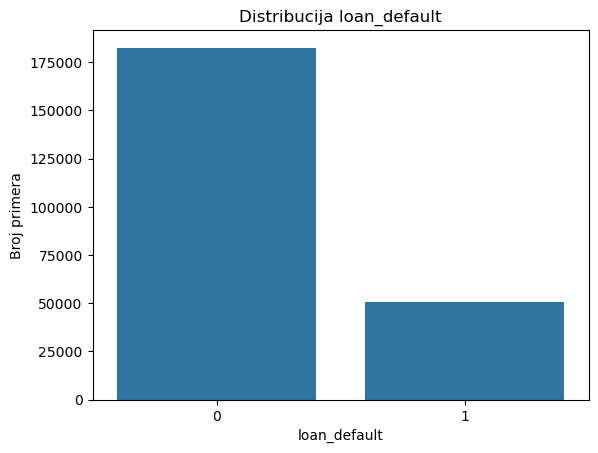

In [61]:
# Vizuelizacija distribucije loan_default koristeći Seaborn
sns.countplot(x='loan_default', data=train_df)
plt.title('Distribucija loan_default')
plt.xlabel('loan_default')
plt.ylabel('Broj primera')
plt.show()

In [62]:
# Dobijanje tačnog broja instanci za svaku klasu
counts = train_df['loan_default'].value_counts()
percentages = train_df['loan_default'].value_counts(normalize=True) * 100

# Printanje rezultata
print("Broj instanci za svaku klasu:\n")
print(counts)

print("\n\nProcenat svake od klasa:\n")
print(percentages)

Broj instanci za svaku klasu:

loan_default
0    182543
1     50611
Name: count, dtype: int64


Procenat svake od klasa:

loan_default
0    78.292888
1    21.707112
Name: proportion, dtype: float64



**Disbalans klasa**

U našem datasetu, izlazne klase loan_default su neravnotežno raspoređene sa oko 175000 instanci za klasu 0 (ne zadato) i oko 50000 instanci za klasu 1 (zadato). To znači da je naš dataset disbalansiran jer postoji značajno više instanci klase 0 u poređenju sa klasom 1.

Ovakav disbalans može dovesti do nekoliko problema:

- Model može postati pristrasan ka većinskoj klasi (klasa 0), što može rezultirati visokim procentom tačnih predikcija za većinsku klasu, ali lošom performansom za manjinsku klasu (klasa 1).
- Model može imati lošiju sposobnost generalizacije za primere iz manjinske klase, što može biti kritično u realnim scenarijima gde je predviđanje manjinske klase (npr. detekcija neplaćenih kredita) važnije.

**Opis cene različitih grešaka**

Postoje dve glavne vrste grešaka u klasifikacionim modelima: lažno pozitivne (False Positives) i lažno negativne (False Negatives). U kontekstu loan_default, ove greške imaju različite posledice:

Lažno pozitivne greške (False Positives, FP):

- Šta znači: Model predviđa da će korisnik zadati kredit (klasa 1), ali korisnik zapravo neće zadati kredit (klasa 0).
- Posledice: Banka može pogrešno odbiti odobravanje kredita korisnicima koji bi redovno otplaćivali svoje obaveze, što može dovesti do gubitka potencijalnih prihoda i nezadovoljstva klijenata.

Lažno negativne greške (False Negatives, FN):

- Šta znači: Model predviđa da korisnik neće zadati kredit (klasa 0), ali korisnik zapravo hoće zadati kredit (klasa 1).
- Posledice: Banka može odobriti kredit korisnicima koji će zadati kredit, što može dovesti do finansijskih gubitaka i povećanja rizika.

**Upravljanje disbalansom klasa**

Da bi se adresirao problem disbalansa klasa, mogu se primeniti sledeći pristupi:

- Reuzorkovanje podataka:
Oversampling manjinske klase: Povećavanje broja instanci klase 1 pomoću tehnika kao što su SMOTE (Synthetic Minority Over-sampling Technique).
Undersampling većinske klase: Smanjenje broja instanci klase 0 kako bi se postigla ravnoteža sa klasom 1.

- Korišćenje ponderisanih metrika:Upotreba metrika kao što su ponderisani F1 skor, ponderisana preciznost i osetljivost koje uzimaju u obzir disbalans klasa.

- Ponderisanje gubitka (Loss weighting): U modelu se mogu primeniti različite težine za greške klase 0 i klase 1 tokom treniranja, kako bi se penalizovale greške za manjinsku klasu.

##### Nedostajuce vrednosti

In [63]:
# Missing values
train_df.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [64]:
# Lista vrednosti koje želite da proverite kao nedostajuće
missing_values = ['-', '', ' ', 'Unknown', 'NA', 'Not Available', 'Missing', 'NaN']

# Inicijalizacija praznog DataFrame-a za brojanje nedostajućih vrednosti
missing_counts = pd.DataFrame(index=train_df.select_dtypes(include=['object']).columns, columns=missing_values)

# Provera nedostajućih vrednosti u kolonama tipa 'object'
for column in train_df.select_dtypes(include=['object']).columns:
    for value in missing_values:
        count = (train_df[column] == value).sum()
        missing_counts.loc[column, value] = count

print("Broj svake od navedenih vrednosti u svakoj od kolona:")
print(missing_counts)

Broj svake od navedenih vrednosti u svakoj od kolona:
                               -       Unknown NA Not Available Missing NaN
Date_of_Birth                  0  0  0       0  0             0       0   0
Employment_Type                0  0  0       0  0             0       0   0
DisbursalDate                  0  0  0       0  0             0       0   0
PERFORM_CNS_SCORE_DESCRIPTION  0  0  0       0  0             0       0   0
AVERAGE_ACCT_AGE               0  0  0       0  0             0       0   0
CREDIT_HISTORY_LENGTH          0  0  0       0  0             0       0   0


##### Vizuelizacije podataka

In [65]:
categorical_cols = train_df.select_dtypes(include=['object']).columns
categorical_df = train_df[categorical_cols]
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = train_df[numeric_cols]

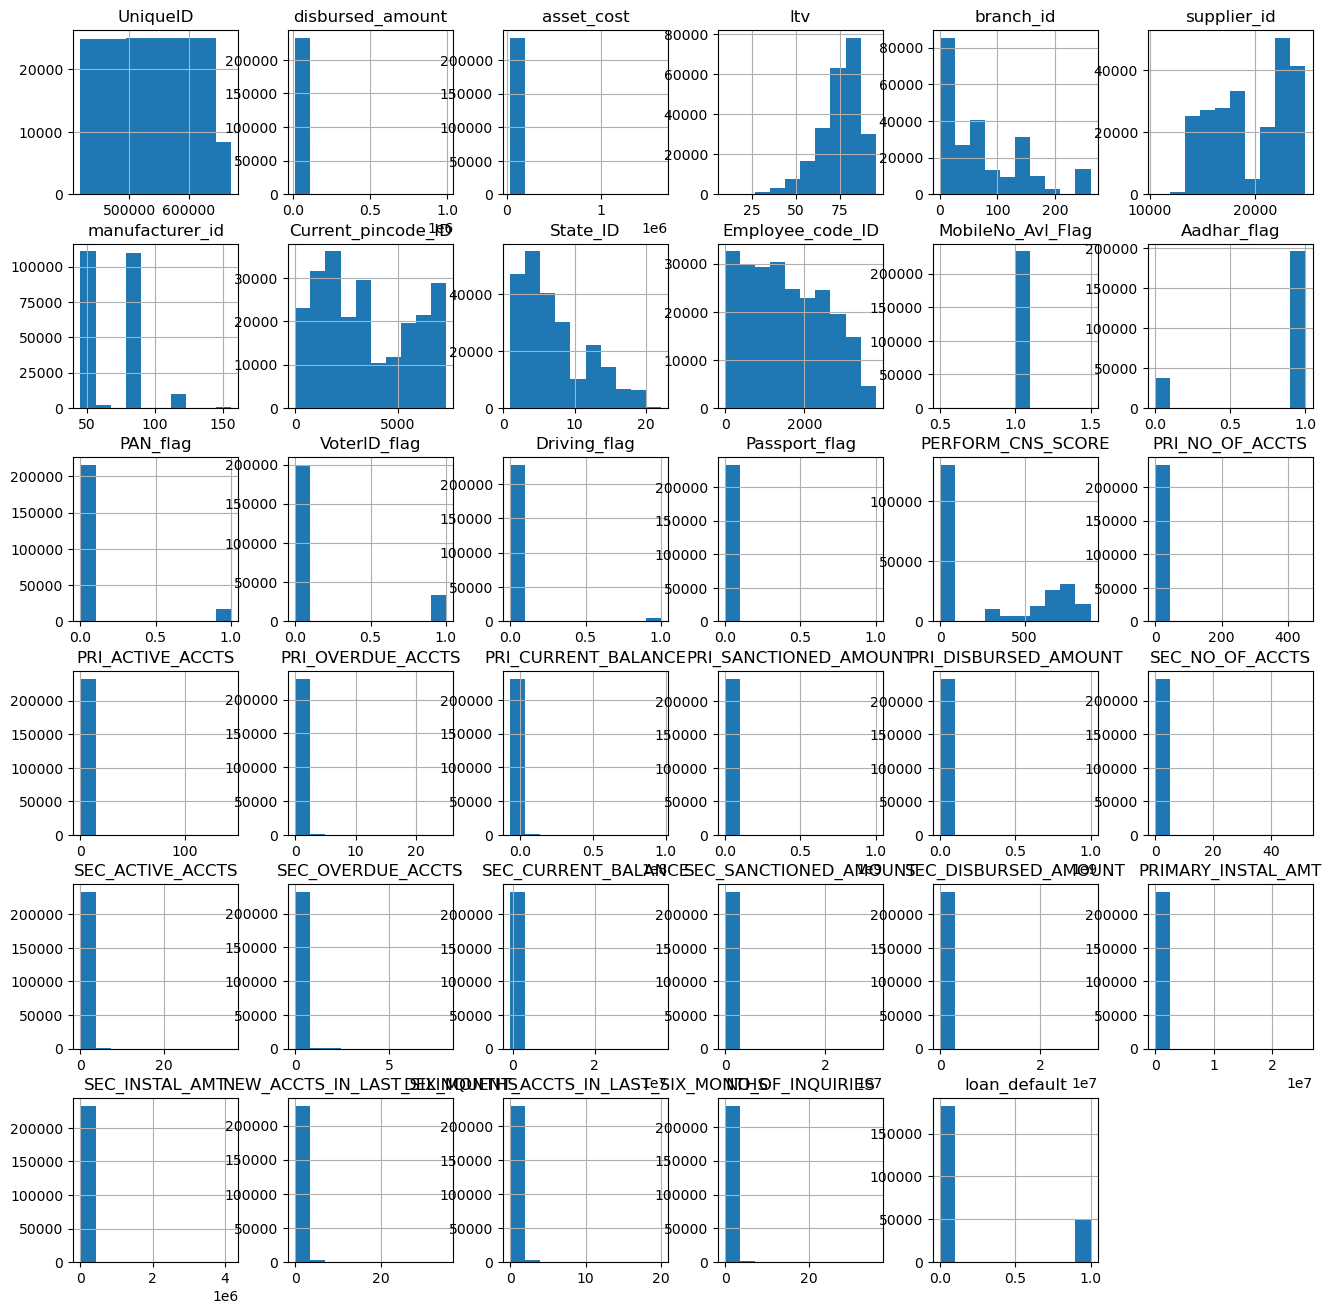

In [66]:
numeric_df.hist(bins=10, figsize=(16,16))
plt.show()

Employment_Type
Self employed    127635
Salaried          97858
Name: count, dtype: int64


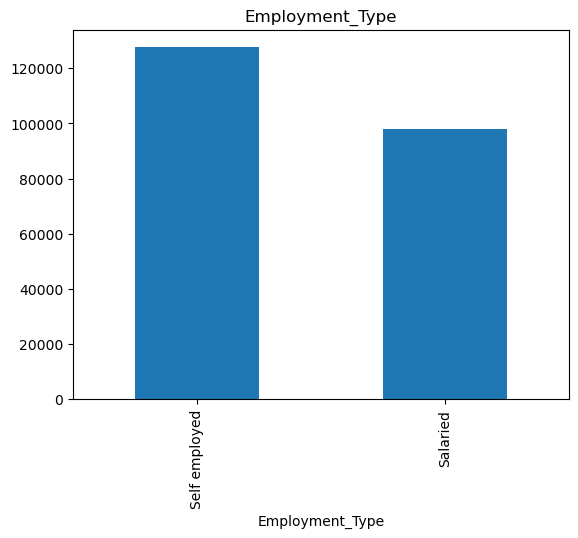

PERFORM_CNS_SCORE_DESCRIPTION
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the c

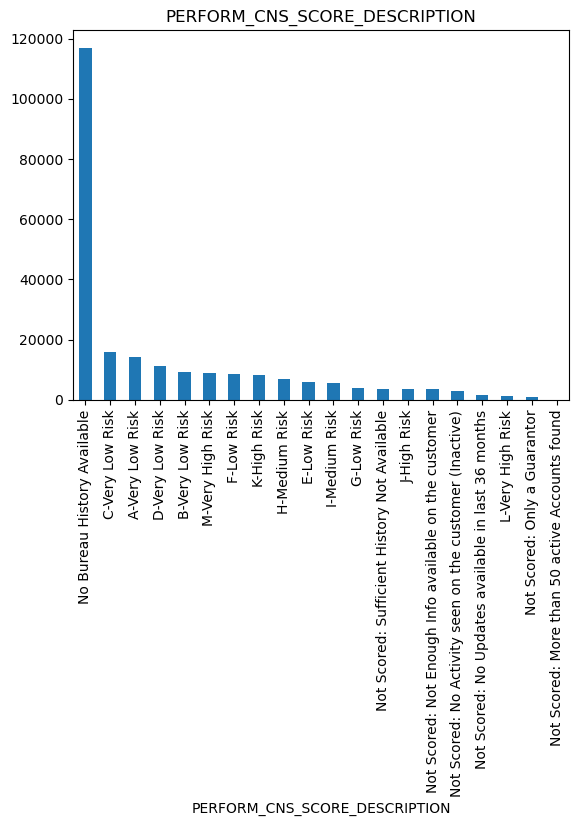

In [67]:
for column in categorical_cols:
    if train_df[column].nunique() < 50:
        print(train_df[column].value_counts())
        train_df[column].value_counts().plot.bar()
        plt.title(column)
        plt.show()

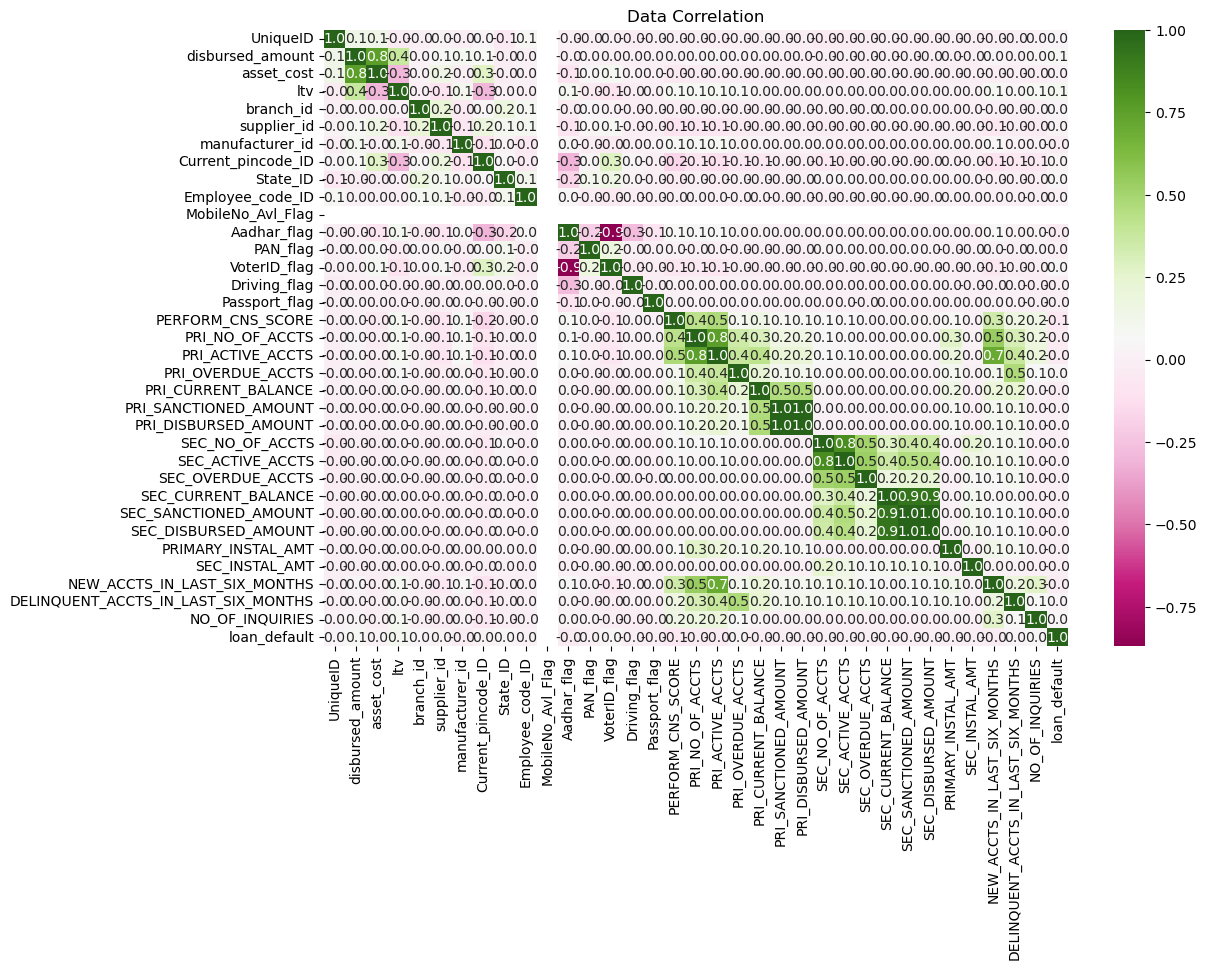

In [68]:
# Izostavljanje kolona sa stringovima ili drugim nepodobnim podacima
numeric_cols = train_df.select_dtypes(include=['number']).columns
numeric_df = train_df[numeric_cols]

# Data Correlation plot
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="PiYG", annot=True, fmt=".1f")
plt.title('Data Correlation')
plt.show()

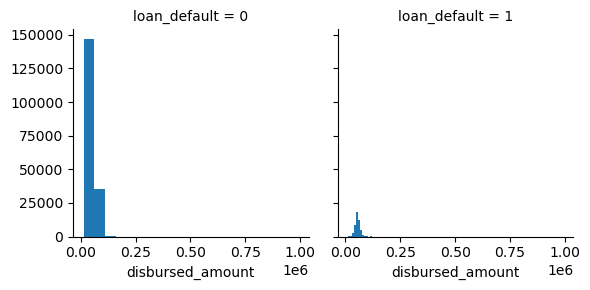

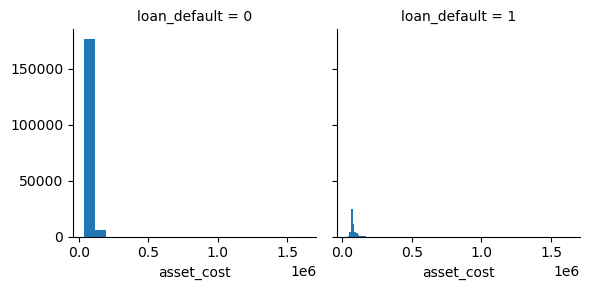

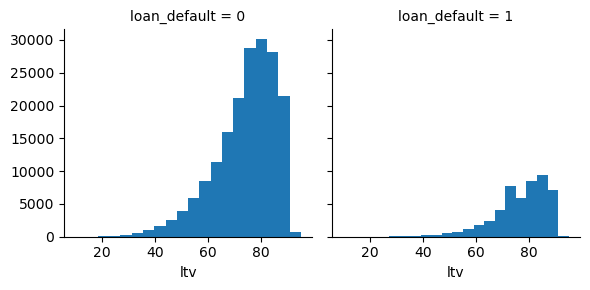

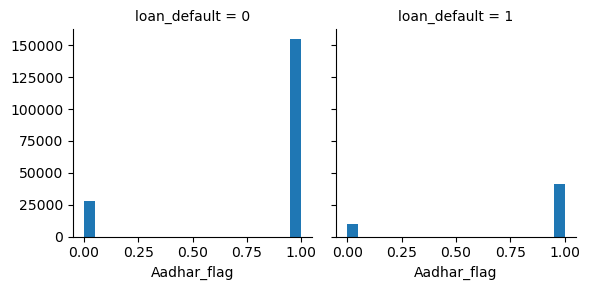

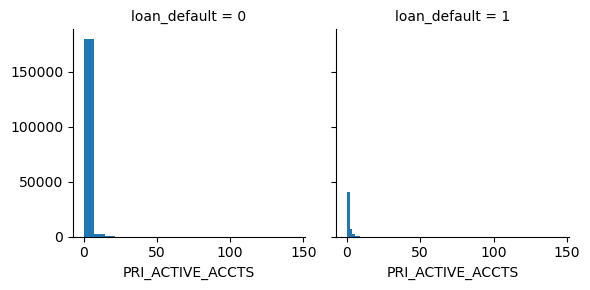

In [69]:
# Numeric Columns of interest
num_interest_cols = ['disbursed_amount','asset_cost', 'ltv', 'Aadhar_flag', 'PRI_ACTIVE_ACCTS']
for column in num_interest_cols:
    g = sns.FacetGrid(train_df, col='loan_default')
    g.map(plt.hist, column, bins=20)

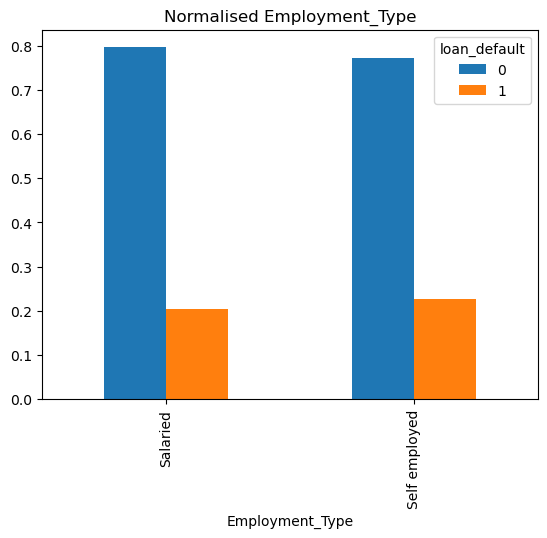

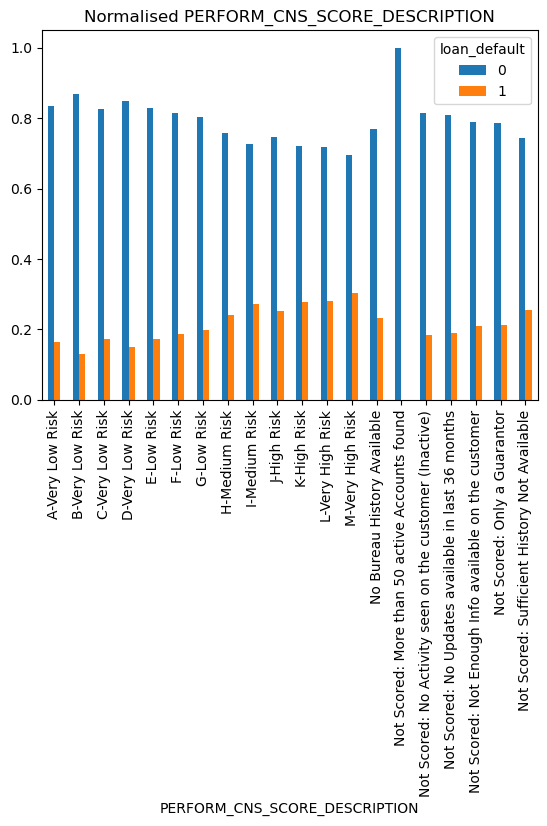

In [70]:
# Categorical Columns of interest
cat_interest_cols = ['Employment_Type', 'PERFORM_CNS_SCORE_DESCRIPTION']
for column in cat_interest_cols:
    train_df.groupby(column)['loan_default'].value_counts(normalize=True).unstack().plot.bar()
    plt.title(f"Normalised {column}")
    plt.show()

## 03. Priprema podataka

##### Nedostajuce vrednosti

In [71]:
# Missing values
train_df.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [72]:
#fill NaN with 'Unknown'
train_df['Employment_Type'] = train_df['Employment_Type'].fillna('Unknown')
train_df['Employment_Type'].value_counts()

Employment_Type
Self employed    127635
Salaried          97858
Unknown            7661
Name: count, dtype: int64

Odlucili smo se na dodavanje vrednosti "Unknown" umesto brisanja redova sa nedostajućim vrednostima (NaN) iz nekoliko razloga:

- Očuvanje podataka: Brisanje redova može dovesti do gubitka korisnih informacija koje mogu biti važne za analizu ili modeliranje podataka.
- Održavanje konzistentnosti: Dodavanjem "Unknown" kao nove kategorije, održavamo konzistentan format podataka u koloni Employment_Type. 
- Smanjenje uticaja na analizu: Ako je broj redova sa nedostajućim vrednostima relativno mali u poređenju sa ukupnim skupom podataka, dodavanje "Unknown" može biti prihvatljivo kako bi se smanjio uticaj nedostajućih podataka na rezultate analize.

##### Transformacija tipova podataka

Kod ispod menja tipove podataka za određene kolone u DataFrame-u train_df. Evo detaljnog objašnjenja šta svaki deo radi:

Konverzija datuma:
Ovi redovi koda konvertuju kolone Date_of_Birth i DisbursalDate u pandas datetime format. Ovo omogućava lakšu manipulaciju i analizu datuma, kao što su ekstrakcija godine, meseca, dana, itd.

Konverzija u kategorijske tipove:
Ovi redovi koda konvertuju navedene kolone u kategorijske tipove podataka (category). Kategorijske kolone su korisne za kolone koje predstavljaju diskretne vrednosti ili oznake, kao što su ID-ovi, tipovi zaposlenja, opisi, itd.
Kategorijski tip podataka omogućava efikasnije skladištenje podataka i može poboljšati performanse prilikom treniranja modela, jer se koristi manje memorije u poređenju sa tekstualnim tipovima podataka.

Zašto je ovo važno?

- Efikasnost: Konvertovanje kolona koje sadrže ponavljajuće vrednosti (kao što su ID-ovi i opisi) u kategorijske tipove može značajno smanjiti memorijsku potrošnju.
- Brža obrada: Rad sa kategorijskim tipovima podataka je brži, posebno kada se radi sa velikim datasetima. Pandas koristi unutrašnju reprezentaciju koja je optimizovana za ove vrste podataka.
- Analiza podataka: Konvertovanje kolona koje predstavljaju datume u datetime format olakšava rad sa datumima, kao što su filtriranje po datumu, izračunavanje vremenskih razlika, itd.

In [73]:
# change dtype
train_df['Date_of_Birth'] = pd.to_datetime(train_df['Date_of_Birth'])
train_df['DisbursalDate'] = pd.to_datetime(train_df['DisbursalDate'])

train_df['branch_id'] = train_df['branch_id'].astype('category')
train_df['supplier_id'] = train_df['supplier_id'].astype('category')
train_df['manufacturer_id'] = train_df['manufacturer_id'].astype('category')
train_df['Current_pincode_ID'] = train_df['Current_pincode_ID'].astype('category')
train_df['Employment_Type'] = train_df['Employment_Type'].astype('category')
train_df['State_ID'] = train_df['State_ID'].astype('category')
train_df['Employee_code_ID'] = train_df['Employee_code_ID'].astype('category')
train_df['PERFORM_CNS_SCORE_DESCRIPTION'] = train_df['PERFORM_CNS_SCORE_DESCRIPTION'].astype('category')

C:\Users\milos\AppData\Local\Temp\ipykernel_6608\3662140528.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Date_of_Birth'] = pd.to_datetime(train_df['Date_of_Birth'])
C:\Users\milos\AppData\Local\Temp\ipykernel_6608\3662140528.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['DisbursalDate'] = pd.to_datetime(train_df['DisbursalDate'])


In [74]:
# function to change age string to number of months
def time_to_months(age):
    age_year, age_month  = age.split(' ')
    age_year = int(age_year.replace('yrs', ''))
    age_month = int(age_month.replace('mon', ''))
    return age_year * 12 + age_month

In [75]:
# convert AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH to numeric
train_df['AVERAGE_ACCT_AGE_MONTHS'] = train_df['AVERAGE_ACCT_AGE'].apply(time_to_months)
train_df['CREDIT_HISTORY_LENGTH_MONTHS'] = train_df['CREDIT_HISTORY_LENGTH'].apply(time_to_months)
# remove transformed cols
train_df = train_df.drop(['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH'], axis=1)

In [76]:
train_df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date_of_Birth                           15433
Employment_Type                             3
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS_SCORE                         573
PERFORM_CNS_SCORE_DESCRIPTION              20
PRI_NO_OF_ACCTS                   

In [77]:
# drop where all values same
train_df = train_df.drop(['MobileNo_Avl_Flag'], axis=1)
# drop columns no influence to customer
train_df = train_df.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID'], axis=1)
# possibly the following should be removed
# train_df = train_df.drop(['branch_id', 'manufacturer_id', 'Employee_code_ID', 'State_ID'], axis=1)

In [79]:
# move loan_default column to the end of the last column in train df
train_df = train_df[[c for c in train_df if c not in ['loan_default']] + ['loan_default']]

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   disbursed_amount                     233154 non-null  int64         
 1   asset_cost                           233154 non-null  int64         
 2   ltv                                  233154 non-null  float64       
 3   branch_id                            233154 non-null  category      
 4   manufacturer_id                      233154 non-null  category      
 5   Date_of_Birth                        233154 non-null  datetime64[ns]
 6   Employment_Type                      233154 non-null  category      
 7   DisbursalDate                        233154 non-null  datetime64[ns]
 8   State_ID                             233154 non-null  category      
 9   Employee_code_ID                     233154 non-null  category      
 